# Preparing new pretraining data

We want to update our pretraining data, to add more data and improve the associated metadata. Here is a list of changes
- we were to aggressive at removing outlier samples for some studies, so we want to make sure more samples are included
- we want to add new studies to the pretraining data
- some of the metadata was incomplete previously, we want to fix that

other possible changes
- include studies that were previously aligned, but excluded to not the best alignment

In [ ]:
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

## Combine all of the metadata and matrixes

In [687]:
all_metadata_dir = '/Users/jonaheaton/ReviveMed Dropbox/Jonah Eaton/mzLearn_preTraining/source_metadata/metadata_2025_july_05'

all_metadata_files = os.listdir(all_metadata_dir)

In [688]:
all_metadata_list = []
for file in all_metadata_files:
    study_metadata = pd.read_csv(f'{all_metadata_dir}/{file}', index_col=0)
    if 'mzml path' in study_metadata.columns:
        study_metadata.index = study_metadata['mzml path'].to_list()
    all_metadata_list.append(study_metadata)

In [689]:
all_metadata = pd.concat(all_metadata_list)
all_metadata['is Female']  = all_metadata['Sex'].map({'F':1, 'M':0})

In [690]:
all_metadata.shape

(25689, 39)

In [528]:
all_metadata.columns

Index(['Study ID', 'Cohort Label v0', 'Job ID', 'is Pediatric', 'Cancer Risk',
       'Column', 'Polarity', 'Sex', 'Subject ID', 'Sample_Class', 'Batch',
       'BMI', 'Benzene_Exposure_Category', 'Smoking Status', 'Age',
       'Ethnicity', 'Race', 'Treatment', 'Diagnosis', 'Diagnosis Type',
       'is Female', 'OS', 'OS_Event', 'Timepoint', 'Region', 'IMDC', 'MSKCC',
       'Dose (mg/kg)', 'PFS', 'PFS_Event', 'ORR', 'Benefit', 'Prior_2',
       'Clinical Trial Phase', 'Type', 'mzml path', 'Diagnosis Details',
       'Emphysema/COPD', 'SARS-CoV-2 Positive'],
      dtype='object')

In [529]:
all_metadata.to_csv(f'{save_dir}/all_metadata.csv')

In [530]:
hilic_pos = all_metadata[(all_metadata['Column'] == 'Hilic') & (all_metadata['Polarity'] == 'Positive')].copy()

In [531]:
hilic_pos[(hilic_pos['Study ID'] == 'ST001422')].shape

(2076, 39)

In [532]:
hilic_pos[(hilic_pos['Study ID'] == 'ST001423')].shape

(1455, 39)

In [533]:
hilic_pos

,Study ID,Cohort Label v0,Job ID,is Pediatric,Cancer Risk,Column,Polarity,Sex,Subject ID,Sample_Class,...,PFS_Event,ORR,Benefit,Prior_2,Clinical Trial Phase,Type,mzml path,Diagnosis Details,Emphysema/COPD,SARS-CoV-2 Positive
10jan12_26-r001.mzML,ST000422,adult_other,550.0,False,False,Hilic,Positive,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
10jan12_56-r001.mzML,ST000422,adult_other,550.0,False,False,Hilic,Positive,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
10jan12_13-r002.mzML,ST000422,adult_other,550.0,False,False,Hilic,Positive,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
10jan12_81-r002.mzML,ST000422,adult_other,550.0,False,False,Hilic,Positive,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
10jan12_55-r002.mzML,ST000422,adult_other,550.0,False,False,Hilic,Positive,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
B9_WU350-376_d7_polar_pos.mzML,ST001849,adult_other,504.0,False,False,Hilic,Positive,M,WU350-376,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Yes
B9_WU350-377_d7_polar_pos.mzML,ST001849,adult_other,504.0,False,False,Hilic,Positive,M,WU350-377,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Yes
B9_WU350-393_d7_polar_pos.mzML,ST001849,adult_other,504.0,False,False,Hilic,Positive,F,WU350-393,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Yes
B9_WU350-398_d7_polar_pos.mzML,ST001849,adult_other,504.0,False,False,Hilic,Positive,M,WU350-398,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Yes


In [534]:
hilic_pos.columns

Index(['Study ID', 'Cohort Label v0', 'Job ID', 'is Pediatric', 'Cancer Risk',
       'Column', 'Polarity', 'Sex', 'Subject ID', 'Sample_Class', 'Batch',
       'BMI', 'Benzene_Exposure_Category', 'Smoking Status', 'Age',
       'Ethnicity', 'Race', 'Treatment', 'Diagnosis', 'Diagnosis Type',
       'is Female', 'OS', 'OS_Event', 'Timepoint', 'Region', 'IMDC', 'MSKCC',
       'Dose (mg/kg)', 'PFS', 'PFS_Event', 'ORR', 'Benefit', 'Prior_2',
       'Clinical Trial Phase', 'Type', 'mzml path', 'Diagnosis Details',
       'Emphysema/COPD', 'SARS-CoV-2 Positive'],
      dtype='object')

In [535]:
print('Number of samples')
print(hilic_pos.shape[0])

print('Sex counts:')
print(hilic_pos.shape[0] - hilic_pos['Sex'].isna().sum())

print('BMI counts:')
print(hilic_pos.shape[0] - hilic_pos['BMI'].isna().sum())

print('Age counts:')
print(hilic_pos.shape[0] - hilic_pos['Age'].isna().sum())

print('Study Ids')
print(hilic_pos['Study ID'].nunique())

Number of samples
22567
Sex counts:
11637
BMI counts:
4104
Age counts:
8841
Study Ids
22


array([[<Axes: title={'center': 'Age'}>]], dtype=object)

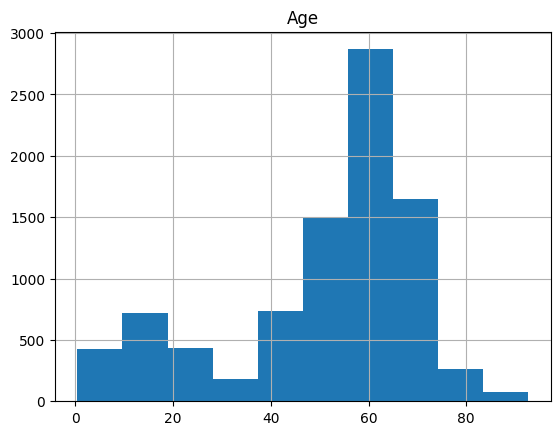

In [536]:
hilic_pos.hist(column='Age')

<Axes: xlabel='Count', ylabel='Study ID'>

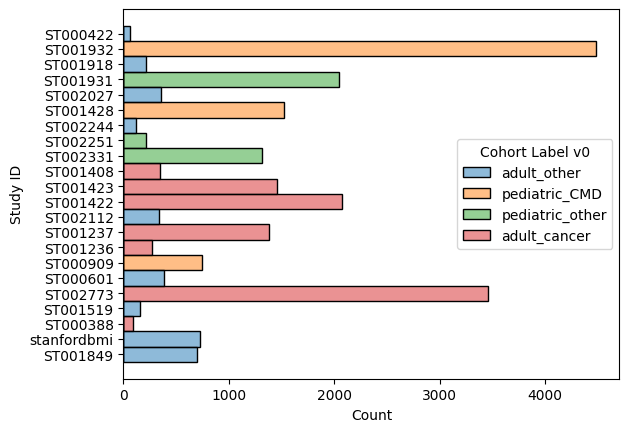

In [537]:
sns.histplot(y='Study ID', hue='Cohort Label v0', data=hilic_pos)

<Axes: xlabel='Cohort Label v0', ylabel='count'>

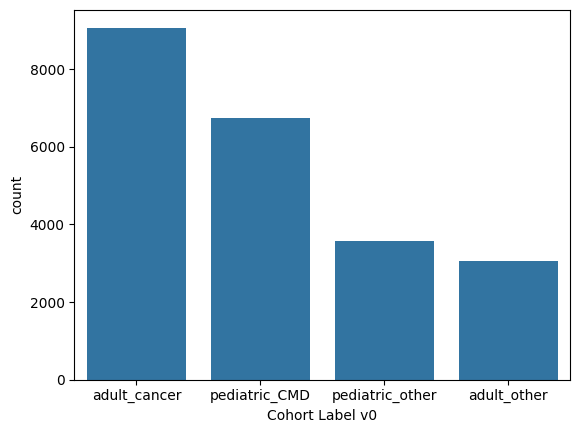

In [538]:
sns.barplot(hilic_pos['Cohort Label v0'].value_counts())

In [539]:
hilic_pos['Study ID'].value_counts()
# missing some of the ST001423, ST001422

Study ID
ST001932       4482
ST002773       3455
ST001422       2076
ST001931       2044
ST001428       1522
ST001423       1455
ST001237       1379
ST002331       1315
ST000909        742
stanfordbmi     726
ST001849        700
ST000601        384
ST002027        356
ST001408        349
ST002112        335
ST001918        273
ST001236        271
ST002251        269
ST001519        158
ST002244        122
ST000388         94
ST000422         60
Name: count, dtype: int64

In [540]:

previous_intensity_file = "/Users/jonaheaton/ReviveMed Dropbox/Jonah Eaton/development_CohortCombination/alignment_RCC_2024_Feb_27/alignment_id_36/grid_search_index_1/subset_robust_Freq, Cohort Log Size Weighted_0.2_rem_['549', '551', '547']_recompute/X.csv"
previous_nans_file = "/Users/jonaheaton/ReviveMed Dropbox/Jonah Eaton/development_CohortCombination/alignment_RCC_2024_Feb_27/alignment_id_36/grid_search_index_1/subset_robust_Freq, Cohort Log Size Weighted_0.2_rem_['549', '551', '547']_recompute/nans.csv"
previous_metadata_file = "/Users/jonaheaton/ReviveMed Dropbox/Jonah Eaton/development_CohortCombination/alignment_RCC_2024_Feb_27/alignment_id_36/grid_search_index_1/subset_robust_Freq, Cohort Log Size Weighted_0.2_rem_['549', '551', '547']_recompute/y.csv"
previous_intensity = pd.read_csv(previous_intensity_file, index_col=0)
previous_metadata = pd.read_csv(previous_metadata_file, index_col=0)

In [541]:
previous_metadata.columns

Index(['cohort_id', 'Study ID', 'Cohort Label', 'Cohort ID Expanded',
       'Study ID Expanded', 'Cohort ID', 'OS', 'OS_Event', 'Age', 'subject ID',
       'study_week', 'Region', 'Sex', 'Race', 'Dose (mg/kg)', 'phase',
       'Treatment', 'Prior_2', 'batch_id', 'runtime_hour', 'run_order',
       'MSKCC', 'ORR', 'Benefit', 'ExtremeResponder', 'PFS', 'PFS_Event', 'MV',
       'Age_Group', 'Benefit BINARY', 'Benefit ORDINAL', 'Nivo Benefit BINARY',
       'MSKCC BINARY', 'MSKCC ORDINAL', 'Matt Set', 'Set'],
      dtype='object')

In [542]:
previous_metadata.shape

(17685, 36)

In [543]:
previous_metadata['Study ID Expanded'].value_counts()

Study ID Expanded
ST001932    4482
ST001422    2051
ST001931    2044
ST001428    1522
ST001237    1379
ST002331    1315
ST001423    1192
ST000909     742
ST001849     691
ST002027     356
ST001408     349
ST002112     335
ST001236     271
ST001918     271
ST002251     242
ST001519     166
ST002244     122
ST000388      95
ST000422      60
Name: count, dtype: int64

In [544]:
# drop the 

kept_previous = previous_metadata[~previous_metadata['Study ID Expanded'].isin(['ST000601','ST001422','ST001423'])].copy()

In [545]:
kept_previous_files = kept_previous.index.to_list()

In [592]:
previous_intensity.shape

(17685, 2736)

In [546]:
saved_files = os.listdir(save_dir)
all_intensity = previous_intensity.loc[kept_previous_files].copy()
for file in saved_files:
    if 'scaled_intensity_matrix' in file:
        print(file)
        new_intensity = pd.read_csv(f'{save_dir}/{file}', index_col=0)
        print(new_intensity.shape)
        missing_cols = [x for x in all_intensity.columns if x not in new_intensity.columns]

        missing_mat = np.repeat(new_intensity.mean(axis=1).values, len(missing_cols)).reshape(new_intensity.shape[0], len(missing_cols))
        missing_mat = pd.DataFrame(missing_mat, index=new_intensity.index, columns=missing_cols)
        new_intensity = pd.concat([new_intensity, missing_mat], axis=1)

        all_intensity = pd.concat([all_intensity, new_intensity])

        print(all_intensity.shape)



ST001423_scaled_intensity_matrix.csv
ST001422_scaled_intensity_matrix.csv
ST000601_scaled_intensity_matrix.csv
stanford_hmp2_scaled_intensity_matrix.csv
shanghai_lung_cancer_scaled_intensity_matrix.csv


In [644]:
all_intensity.shape

(22288, 3226)

In [547]:
all_intensity.to_csv(f'{save_dir}/all_intensity_matrix.csv')

In [620]:
previous_nans = pd.read_csv(previous_nans_file, index_col=0)
saved_files = os.listdir(save_dir)
all_nans = previous_nans.loc[kept_previous_files].copy()

In [626]:
all_nans = all_nans.astype(int)

In [627]:
all_nans

,FT10031,FT10035,FT10037,FT10039,FT10041,FT10042,FT10044,FT1006,FT10068,FT1007,...,FT9951,FT9975,FT9978,FT9980,FT9984,FT9985,FT9988,FT9989,FT9997,FT9999
VT_171028_M314_167.mzML,1,1,1,1,1,1,1,1,1,0,...,1,1,1,1,1,1,1,1,1,1
VT_170729_M021_175.mzML,1,1,1,1,1,1,1,1,1,0,...,1,1,1,1,1,1,1,1,1,1
YW_200307_M431_189.mzML,1,1,1,1,1,1,1,1,1,1,...,1,1,1,1,1,1,1,1,1,1
VT_181116_M338_047.mzML,1,1,1,1,1,1,0,1,1,1,...,1,1,0,1,1,1,1,1,1,1
VT_170729_M021_179.mzML,1,1,1,1,1,1,1,1,1,0,...,1,1,1,1,1,1,1,1,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
0780a_Marios_PD1_Inhib2_HP-PREFA41.mzML,0,0,0,0,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0
0900b_Marios_PD1_Inhib2_HP-PREFB47.mzML,0,0,0,0,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0
1200a_Marios_PD1_Inhib2_HP-PREFA62.mzML,0,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
0960b_Marios_PD1_Inhib2_HP-PREFB50.mzML,0,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [618]:
all_nans = all_nans.astype(int)

for file in saved_files:
    if 'nan_matrix' in file:
        print(file)
        new_nans = pd.read_csv(f'{save_dir}/{file}', index_col=0)
        new_int = pd.read_csv(f'{save_dir}/{file.replace("nan_matrix","scaled_intensity_matrix")}', index_col=0)

        # if 'FT' not in new_nans.columns[0][:2]:
        #     new_nans = new_nans.T

        # missing_cols = [x for x in all_nans.columns if x not in new_nans.columns]

        # missing_mat = np.repeat(new_nans.mean(axis=1).values, len(missing_cols)).reshape(new_nans.shape[0], len(missing_cols))
        # missing_mat[:,:] = False
        # missing_mat = pd.DataFrame(missing_mat, index=new_nans.index, columns=missing_cols)
        # new_nans = pd.concat([new_nans, missing_mat], axis=1)
        # break
        new_nans = new_nans.astype(int)
        

        print(new_nans.shape)
        all_nans = pd.concat([all_nans, new_nans],axis=0)
        print(all_nans.shape)

        break



ST001422_nan_matrix.csv
(2075, 1744)
(4811, 16186)


In [642]:
previous_intensity2 = previous_intensity.loc[kept_previous_files].copy()


In [637]:
temp = pd.concat([all_nans, new_nans],axis=0)

In [643]:
[x for x in new_int.columns if x not in previous_intensity2.columns]

['FT10046',
 'FT10071',
 'FT10098',
 'FT10186',
 'FT10286',
 'FT10309',
 'FT10422',
 'FT10467',
 'FT10642',
 'FT10779',
 'FT10885',
 'FT10933',
 'FT11027',
 'FT11066',
 'FT11110',
 'FT11141',
 'FT11149',
 'FT11184',
 'FT11212',
 'FT11287',
 'FT11300',
 'FT11303',
 'FT11338',
 'FT11345',
 'FT11359',
 'FT11394',
 'FT11511',
 'FT11522',
 'FT11542',
 'FT11557',
 'FT11583',
 'FT11624',
 'FT11631',
 'FT11719',
 'FT11723',
 'FT11753',
 'FT11778',
 'FT1189',
 'FT1668',
 'FT1809',
 'FT1870',
 'FT1991',
 'FT2011',
 'FT2240',
 'FT2259',
 'FT2507',
 'FT2515',
 'FT2628',
 'FT2703',
 'FT2800',
 'FT2841',
 'FT3011',
 'FT3078',
 'FT3121',
 'FT313',
 'FT327',
 'FT3299',
 'FT3357',
 'FT3366',
 'FT338',
 'FT3497',
 'FT3557',
 'FT357',
 'FT3592',
 'FT3709',
 'FT3767',
 'FT3875',
 'FT3880',
 'FT3892',
 'FT3950',
 'FT4084',
 'FT4195',
 'FT4262',
 'FT4297',
 'FT4347',
 'FT4373',
 'FT4401',
 'FT4406',
 'FT4414',
 'FT442',
 'FT4575',
 'FT4586',
 'FT4642',
 'FT4845',
 'FT4859',
 'FT4869',
 'FT4876',
 'FT4912',


In [ ]:
[x for x in new_nans.columns if x not in all_nans.columns]

In [641]:
[x for x in new_nans.columns if x not in all_nans.columns]

['FT10046',
 'FT10071',
 'FT10098',
 'FT10186',
 'FT10286',
 'FT10309',
 'FT10422',
 'FT10467',
 'FT10642',
 'FT10779',
 'FT10885',
 'FT10933',
 'FT11027',
 'FT11066',
 'FT11110',
 'FT11141',
 'FT11149',
 'FT11184',
 'FT11212',
 'FT11287',
 'FT11300',
 'FT11303',
 'FT11338',
 'FT11345',
 'FT11359',
 'FT11394',
 'FT11511',
 'FT11522',
 'FT11542',
 'FT11557',
 'FT11583',
 'FT11624',
 'FT11631',
 'FT11719',
 'FT11723',
 'FT11753',
 'FT11778',
 'FT1189',
 'FT1668',
 'FT1809',
 'FT1870',
 'FT1991',
 'FT2011',
 'FT2240',
 'FT2259',
 'FT2507',
 'FT2515',
 'FT2628',
 'FT2703',
 'FT2800',
 'FT2841',
 'FT3011',
 'FT3078',
 'FT3121',
 'FT313',
 'FT327',
 'FT3299',
 'FT3357',
 'FT3366',
 'FT338',
 'FT3497',
 'FT3557',
 'FT357',
 'FT3592',
 'FT3709',
 'FT3767',
 'FT3875',
 'FT3880',
 'FT3892',
 'FT3950',
 'FT4084',
 'FT4195',
 'FT4262',
 'FT4297',
 'FT4347',
 'FT4373',
 'FT4401',
 'FT4406',
 'FT4414',
 'FT442',
 'FT4575',
 'FT4586',
 'FT4642',
 'FT4845',
 'FT4859',
 'FT4869',
 'FT4876',
 'FT4912',


In [639]:
all_nans

,FT10031,FT10035,FT10037,FT10039,FT10041,FT10042,FT10044,FT1006,FT10068,FT1007,...,FT9951,FT9975,FT9978,FT9980,FT9984,FT9985,FT9988,FT9989,FT9997,FT9999
VT_171028_M314_167.mzML,1,1,1,1,1,1,1,1,1,0,...,1,1,1,1,1,1,1,1,1,1
VT_170729_M021_175.mzML,1,1,1,1,1,1,1,1,1,0,...,1,1,1,1,1,1,1,1,1,1
YW_200307_M431_189.mzML,1,1,1,1,1,1,1,1,1,1,...,1,1,1,1,1,1,1,1,1,1
VT_181116_M338_047.mzML,1,1,1,1,1,1,0,1,1,1,...,1,1,0,1,1,1,1,1,1,1
VT_170729_M021_179.mzML,1,1,1,1,1,1,1,1,1,0,...,1,1,1,1,1,1,1,1,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
0780a_Marios_PD1_Inhib2_HP-PREFA41.mzML,0,0,0,0,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0
0900b_Marios_PD1_Inhib2_HP-PREFB47.mzML,0,0,0,0,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0
1200a_Marios_PD1_Inhib2_HP-PREFA62.mzML,0,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
0960b_Marios_PD1_Inhib2_HP-PREFB50.mzML,0,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [638]:
len(temp.columns.unique())

2874

In [623]:
new_nans

,FT10037,FT10039,FT10041,FT10042,FT10044,FT10046,FT1006,FT1007,FT10071,FT10089,...,FT9905,FT9907,FT9917,FT9928,FT9931,FT9935,FT9951,FT9972,FT9975,FT9980
VT_160120_001.mzML,1,1,1,0,1,1,0,1,0,0,...,1,0,0,0,0,0,0,1,0,1
VT_160120_003.mzML,1,1,0,0,1,1,0,1,0,0,...,1,0,0,0,0,0,0,0,0,1
VT_160120_005.mzML,1,1,0,0,1,1,0,1,0,0,...,0,1,0,0,0,0,0,1,0,1
VT_160120_007.mzML,1,1,0,0,1,1,0,1,0,1,...,1,0,0,0,0,0,0,0,0,1
VT_160120_009.mzML,1,1,0,0,1,1,0,1,0,1,...,1,0,0,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
VT_160226_135.mzML,1,1,1,1,0,1,1,1,1,1,...,1,0,0,0,0,0,0,1,0,1
VT_160226_137.mzML,1,1,1,1,0,1,0,1,1,1,...,1,0,0,0,0,0,0,1,0,0
VT_160226_139.mzML,1,1,1,1,1,1,0,1,1,1,...,1,0,0,0,0,0,0,1,0,1
VT_160226_141.mzML,1,1,1,1,1,1,0,1,0,1,...,1,0,0,0,0,0,0,1,0,1


In [622]:
new_nans.shape

(2075, 1744)

In [619]:
all_nans.shape

(16186, 4811)

In [617]:
new_nans

,FT10037,FT10039,FT10041,FT10042,FT10044,FT10046,FT1006,FT1007,FT10071,FT10089,...,FT9905,FT9907,FT9917,FT9928,FT9931,FT9935,FT9951,FT9972,FT9975,FT9980
VT_160120_001.mzML,1,1,1,0,1,1,0,1,0,0,...,1,0,0,0,0,0,0,1,0,1
VT_160120_003.mzML,1,1,0,0,1,1,0,1,0,0,...,1,0,0,0,0,0,0,0,0,1
VT_160120_005.mzML,1,1,0,0,1,1,0,1,0,0,...,0,1,0,0,0,0,0,1,0,1
VT_160120_007.mzML,1,1,0,0,1,1,0,1,0,1,...,1,0,0,0,0,0,0,0,0,1
VT_160120_009.mzML,1,1,0,0,1,1,0,1,0,1,...,1,0,0,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
VT_160226_135.mzML,1,1,1,1,0,1,1,1,1,1,...,1,0,0,0,0,0,0,1,0,1
VT_160226_137.mzML,1,1,1,1,0,1,0,1,1,1,...,1,0,0,0,0,0,0,1,0,0
VT_160226_139.mzML,1,1,1,1,1,1,0,1,1,1,...,1,0,0,0,0,0,0,1,0,1
VT_160226_141.mzML,1,1,1,1,1,1,0,1,0,1,...,1,0,0,0,0,0,0,1,0,1


In [605]:
all_nans

,FT10031,FT10035,FT10037,FT10039,FT10041,FT10042,FT10044,FT1006,FT10068,FT1007,...,FT9905,FT9907,FT9917,FT9928,FT9931,FT9935,FT9951,FT9972,FT9975,FT9980
VT_171028_M314_167.mzML,True,True,True,True,True,True,True,True,True,False,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
VT_170729_M021_175.mzML,True,True,True,True,True,True,True,True,True,False,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
YW_200307_M431_189.mzML,True,True,True,True,True,True,True,True,True,True,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
VT_181116_M338_047.mzML,True,True,True,True,True,True,False,True,True,True,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
VT_170729_M021_179.mzML,True,True,True,True,True,True,True,True,True,False,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
VT_160226_135.mzML,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,True,False,False,False,False,False,False,True,False,True
VT_160226_137.mzML,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,True,False,False,False,False,False,False,True,False,False
VT_160226_139.mzML,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,True,False,False,False,False,False,False,True,False,True
VT_160226_141.mzML,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,True,False,False,False,False,False,False,True,False,True


In [604]:
new_nans

,FT10037,FT10039,FT10041,FT10042,FT10044,FT10046,FT1006,FT1007,FT10071,FT10089,...,FT9905,FT9907,FT9917,FT9928,FT9931,FT9935,FT9951,FT9972,FT9975,FT9980
VT_160120_001.mzML,True,True,True,False,True,True,False,True,False,False,...,True,False,False,False,False,False,False,True,False,True
VT_160120_003.mzML,True,True,False,False,True,True,False,True,False,False,...,True,False,False,False,False,False,False,False,False,True
VT_160120_005.mzML,True,True,False,False,True,True,False,True,False,False,...,False,True,False,False,False,False,False,True,False,True
VT_160120_007.mzML,True,True,False,False,True,True,False,True,False,True,...,True,False,False,False,False,False,False,False,False,True
VT_160120_009.mzML,True,True,False,False,True,True,False,True,False,True,...,True,False,False,False,False,False,False,False,False,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
VT_160226_135.mzML,True,True,True,True,False,True,True,True,True,True,...,True,False,False,False,False,False,False,True,False,True
VT_160226_137.mzML,True,True,True,True,False,True,False,True,True,True,...,True,False,False,False,False,False,False,True,False,False
VT_160226_139.mzML,True,True,True,True,True,True,False,True,True,True,...,True,False,False,False,False,False,False,True,False,True
VT_160226_141.mzML,True,True,True,True,True,True,False,True,False,True,...,True,False,False,False,False,False,False,True,False,True


In [602]:
new_nans

,FT10037,FT10039,FT10041,FT10042,FT10044,FT10046,FT1006,FT1007,FT10071,FT10089,...,FT9905,FT9907,FT9917,FT9928,FT9931,FT9935,FT9951,FT9972,FT9975,FT9980
VT_160120_001.mzML,True,True,True,False,True,True,False,True,False,False,...,True,False,False,False,False,False,False,True,False,True
VT_160120_003.mzML,True,True,False,False,True,True,False,True,False,False,...,True,False,False,False,False,False,False,False,False,True
VT_160120_005.mzML,True,True,False,False,True,True,False,True,False,False,...,False,True,False,False,False,False,False,True,False,True
VT_160120_007.mzML,True,True,False,False,True,True,False,True,False,True,...,True,False,False,False,False,False,False,False,False,True
VT_160120_009.mzML,True,True,False,False,True,True,False,True,False,True,...,True,False,False,False,False,False,False,False,False,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
VT_160226_135.mzML,True,True,True,True,False,True,True,True,True,True,...,True,False,False,False,False,False,False,True,False,True
VT_160226_137.mzML,True,True,True,True,False,True,False,True,True,True,...,True,False,False,False,False,False,False,True,False,False
VT_160226_139.mzML,True,True,True,True,True,True,False,True,True,True,...,True,False,False,False,False,False,False,True,False,True
VT_160226_141.mzML,True,True,True,True,True,True,False,True,False,True,...,True,False,False,False,False,False,False,True,False,True


In [599]:
all_nans.shape

(20667, 2874)

In [597]:
new_nans.shape

(2075, 1744)

In [596]:
new_int.shape

(2075, 1744)

In [598]:
new_int

,FT10037,FT10039,FT10041,FT10042,FT10044,FT10046,FT1006,FT1007,FT10071,FT10089,...,FT9905,FT9907,FT9917,FT9928,FT9931,FT9935,FT9951,FT9972,FT9975,FT9980
VT_160120_001.mzML,0.093245,0.087186,0.146938,-0.113207,0.193099,0.045698,0.220885,0.162623,-7.049922,2.928353,...,0.123150,5.830387,7.862187,2.201605,6.725855,8.319380,2.192188,0.256119,1.037220,0.331534
VT_160120_003.mzML,0.093245,0.087186,-0.755285,0.668846,0.193099,0.045698,-0.068341,0.162623,-5.403614,3.017734,...,0.123150,6.130938,8.362752,1.892175,7.114798,7.778943,2.756604,-2.357894,0.727733,0.331534
VT_160120_005.mzML,0.093245,0.087186,-1.552251,0.355667,0.193099,0.045698,1.260408,0.162623,-4.655655,2.758262,...,-1.851469,0.189385,7.967557,1.913950,6.892009,7.738552,2.290906,0.256119,0.722744,0.331534
VT_160120_007.mzML,0.093245,0.087186,-0.164735,-0.074477,0.193099,0.045698,0.135376,0.162623,1.703833,0.072271,...,0.123150,0.493929,1.475314,1.303236,0.439633,2.856194,1.327647,-0.207083,0.172619,0.331534
VT_160120_009.mzML,0.093245,0.087186,0.462431,-0.199698,0.193099,0.045698,1.846729,0.162623,0.314088,0.072271,...,0.123150,0.606838,-1.099593,1.690783,-1.886159,1.503944,0.669335,0.998173,0.040919,0.331534
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
VT_160226_135.mzML,0.093245,0.087186,0.146938,0.117229,-1.626793,0.045698,0.204914,0.162623,0.114068,0.072271,...,0.123150,-0.886139,-0.677279,-0.167225,-1.336225,0.367993,0.094666,0.256119,0.174173,0.331534
VT_160226_137.mzML,0.093245,0.087186,0.146938,0.117229,-1.551893,0.045698,0.429783,0.162623,0.114068,0.072271,...,0.123150,0.119782,-0.885039,-0.048337,-0.451324,-0.058759,0.334952,0.256119,0.161167,-2.464373
VT_160226_139.mzML,0.093245,0.087186,0.146938,0.117229,0.193099,0.045698,1.813546,0.162623,0.114068,0.072271,...,0.123150,2.143580,2.332047,4.921189,1.021539,1.809844,5.671010,0.256119,-1.215273,0.331534
VT_160226_141.mzML,0.093245,0.087186,0.146938,0.117229,0.193099,0.045698,1.428069,0.162623,-5.448842,0.072271,...,0.123150,2.322336,2.471448,4.681173,1.684924,2.469160,6.261239,0.256119,-1.632521,0.331534


In [591]:
new_nans

,FT10037,FT10039,FT10041,FT10042,FT10044,FT10046,FT1006,FT1007,FT10071,FT10089,...,FT9905,FT9907,FT9917,FT9928,FT9931,FT9935,FT9951,FT9972,FT9975,FT9980
VT_160120_001.mzML,True,True,True,False,True,True,False,True,False,False,...,True,False,False,False,False,False,False,True,False,True
VT_160120_003.mzML,True,True,False,False,True,True,False,True,False,False,...,True,False,False,False,False,False,False,False,False,True
VT_160120_005.mzML,True,True,False,False,True,True,False,True,False,False,...,False,True,False,False,False,False,False,True,False,True
VT_160120_007.mzML,True,True,False,False,True,True,False,True,False,True,...,True,False,False,False,False,False,False,False,False,True
VT_160120_009.mzML,True,True,False,False,True,True,False,True,False,True,...,True,False,False,False,False,False,False,False,False,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
VT_160226_135.mzML,True,True,True,True,False,True,True,True,True,True,...,True,False,False,False,False,False,False,True,False,True
VT_160226_137.mzML,True,True,True,True,False,True,False,True,True,True,...,True,False,False,False,False,False,False,True,False,False
VT_160226_139.mzML,True,True,True,True,True,True,False,True,True,True,...,True,False,False,False,False,False,False,True,False,True
VT_160226_141.mzML,True,True,True,True,True,True,False,True,False,True,...,True,False,False,False,False,False,False,True,False,True


In [553]:
new_nans

,FT10031,FT10041,FT10044,FT1006,FT10068,FT10089,FT10091,FT10094,FT10095,FT10097,...,FT9911,FT9913,FT9914,FT9923,FT9978,FT9980,FT9984,FT9985,FT9988,FT9997
ZN3TBJM-1013_HILIC-pos-B1.mzML,True,False,True,True,True,False,False,False,False,False,...,False,False,False,False,True,True,True,True,False,True
ZNED4XZ-4014_HILIC-pos-B1.mzML,True,False,True,True,False,False,False,False,False,False,...,False,False,False,False,True,True,False,True,False,True
ZLZNCLZ-2013_HILIC-pos-B1.mzML,True,True,True,True,True,False,False,False,False,False,...,False,False,False,False,True,True,False,False,False,True
ZLZQMEV-07_HILIC-pos-B1.mzML,True,False,True,True,True,False,False,False,False,False,...,False,False,False,False,True,True,False,True,False,True
ZN0JE53-02_HILIC-pos-B1.mzML,True,False,True,True,True,False,False,False,False,False,...,False,False,False,True,True,True,True,False,False,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Exercise_HILIC-pos_ZN3TBJM-E17.mzML,False,False,True,True,True,False,False,True,False,False,...,True,False,False,False,False,True,False,True,False,False
Exercise_HILIC-pos_ZPMBHPS-E18.mzML,False,True,True,True,True,False,False,True,False,False,...,False,False,False,False,False,True,False,True,False,False
Exercise_HILIC-pos_ZPEL6L3-E18.mzML,False,True,True,True,True,False,False,True,False,False,...,False,False,False,True,False,True,False,True,False,False
Exercise_HILIC-pos_ZWFDEY0-E18.mzML,False,False,True,True,True,False,False,True,False,False,...,False,False,False,False,False,True,False,True,True,True


In [551]:
previous_nans

,FT10031,FT10035,FT10037,FT10039,FT10041,FT10042,FT10044,FT1006,FT10068,FT1007,...,FT9951,FT9975,FT9978,FT9980,FT9984,FT9985,FT9988,FT9989,FT9997,FT9999
VT_171028_M314_167.mzML,True,True,True,True,True,True,True,True,True,False,...,True,True,True,True,True,True,True,True,True,True
VT_170729_M021_175.mzML,True,True,True,True,True,True,True,True,True,False,...,True,True,True,True,True,True,True,True,True,True
YW_200307_M431_189.mzML,True,True,True,True,True,True,True,True,True,True,...,True,True,True,True,True,True,True,True,True,True
VT_181116_M338_047.mzML,True,True,True,True,True,True,False,True,True,True,...,True,True,False,True,True,True,True,True,True,True
VT_170729_M021_179.mzML,True,True,True,True,True,True,True,True,True,False,...,True,True,True,True,True,True,True,True,True,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
0780a_Marios_PD1_Inhib2_HP-PREFA41.mzML,False,False,False,False,False,False,False,False,False,False,...,False,True,False,False,False,False,False,False,False,False
0900b_Marios_PD1_Inhib2_HP-PREFB47.mzML,False,False,False,False,False,False,False,False,False,False,...,False,True,False,False,False,False,False,False,False,False
1200a_Marios_PD1_Inhib2_HP-PREFA62.mzML,False,False,False,False,False,False,True,False,False,False,...,False,False,False,False,False,False,False,False,False,False
0960b_Marios_PD1_Inhib2_HP-PREFB50.mzML,False,False,False,False,False,False,True,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [495]:
'FT10031' in new_nans.columns

False

In [552]:
all_nans

,FT10031,FT10035,FT10037,FT10039,FT10041,FT10042,FT10044,FT1006,FT10068,FT1007,...,FT8832,FT8971,FT9101,FT9103,FT9339,FT9421,FT9449,FT9525,FT9710,FT9730
VT_171028_M314_167.mzML,True,True,True,True,True,True,True,True,True,False,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
VT_170729_M021_175.mzML,True,True,True,True,True,True,True,True,True,False,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
YW_200307_M431_189.mzML,True,True,True,True,True,True,True,True,True,True,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
VT_181116_M338_047.mzML,True,True,True,True,True,True,False,True,True,True,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
VT_170729_M021_179.mzML,True,True,True,True,True,True,True,True,True,False,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Exercise_HILIC-pos_ZN3TBJM-E17.mzML,False,NaN,NaN,NaN,False,NaN,True,True,True,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Exercise_HILIC-pos_ZPMBHPS-E18.mzML,False,NaN,NaN,NaN,True,NaN,True,True,True,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Exercise_HILIC-pos_ZPEL6L3-E18.mzML,False,NaN,NaN,NaN,True,NaN,True,True,True,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Exercise_HILIC-pos_ZWFDEY0-E18.mzML,False,NaN,NaN,NaN,False,NaN,True,True,True,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [475]:
new_nans.shape

(726, 1767)

In [473]:
all_nans

,FT10031,FT10035,FT10037,FT10039,FT10041,FT10042,FT10044,FT1006,FT10068,FT1007,...,FT2737,FT2760,FT2763,FT2774,FT2765,FT171,FT159,FT2796,FT168,FT2848
VT_171028_M314_167.mzML,True,True,True,True,True,True,True,True,True,False,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
VT_170729_M021_175.mzML,True,True,True,True,True,True,True,True,True,False,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
YW_200307_M431_189.mzML,True,True,True,True,True,True,True,True,True,True,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
VT_181116_M338_047.mzML,True,True,True,True,True,True,False,True,True,True,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
VT_170729_M021_179.mzML,True,True,True,True,True,True,True,True,True,False,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Exercise_HILIC-pos_ZN3TBJM-E17.mzML,False,NaN,NaN,NaN,False,NaN,True,True,True,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Exercise_HILIC-pos_ZPMBHPS-E18.mzML,False,NaN,NaN,NaN,True,NaN,True,True,True,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Exercise_HILIC-pos_ZPEL6L3-E18.mzML,False,NaN,NaN,NaN,True,NaN,True,True,True,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Exercise_HILIC-pos_ZWFDEY0-E18.mzML,False,NaN,NaN,NaN,False,NaN,True,True,True,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [474]:
all_nans.to_csv(f'{save_dir}/all_nans.csv')        

KeyboardInterrupt: 

In [448]:
all_intensity.shape

(22288, 5560)

In [449]:
previous_metadata['Previous Study ID'] = previous_metadata['Study ID Expanded']
previous_metadata['Previous Job ID'] = previous_metadata['cohort_id']
previous_metadata['Matt Set Label'] = previous_metadata['Matt Set']
previous_metadata['Previous Set'] = previous_metadata['Set']
hilic_pos_metadata = hilic_pos.join(previous_metadata[['Previous Study ID','Previous Job ID','Matt Set Label','Previous Set']],how='outer')
print(hilic_pos_metadata.shape)


(22586, 43)


In [456]:

study_id_list = hilic_pos['Study ID'].unique()
all_save_dir = '/Users/jonaheaton/ReviveMed Dropbox/Jonah Eaton/mzLearn_preTraining/data_2024_July_08'                                             
                                             
for study_id in study_id_list:
    scaled_int_file = f'{all_save_dir}/{study_id}_scaled_intensity_matrix.csv'
    if os.path.exists(scaled_int_file):
        print('---')
        print(f'{study_id} already exists')
        continue

    print('------')
    print(study_id)
    subset_metadata = hilic_pos[hilic_pos['Study ID'] == study_id].copy()
    print(subset_metadata.shape)
    subset_samples = subset_metadata.index.to_list()
    print('N samples in metadata:', len(subset_samples))
    common_subset_samples = [x for x in subset_samples if x in all_intensity.index]
    print('N samples in common with intensity matrix:', len(common_subset_samples))

    if  len(common_subset_samples) < 0.8 * len(subset_samples):
        print('!!! Not enough samples to use this study !!!')
        break

    subset_metadata.loc[common_subset_samples,:].to_csv(f'{all_save_dir}/{study_id}_metadata.csv')
    subset_intensity = all_intensity.loc[common_subset_samples].copy()
    
    subset_nans = all_nans.loc[common_subset_samples].copy()
    subset_nans.to_csv(f'{all_save_dir}/{study_id}_nans.csv')

    # fill in the missing values with the mean of the feature (this should already be done)
    # subset_intensity.fillna(subset_intensity.mean(), inplace=True)

    if subset_intensity.isna().sum().sum() > 0:
        scaler = StandardScaler()
        subset_intensity_scaled = scaler.fit_transform(subset_intensity)
        subset_intensity_scaled = pd.DataFrame(subset_intensity_scaled, index=subset_intensity.index, columns=subset_intensity.columns)

        subset_intensity_scaled = subset_intensity_scaled.T
        subset_intensity_scaled.fillna(subset_intensity_scaled.mean(), inplace=True)

    else:
        subset_intensity_scaled = subset_intensity.copy()

    subset_intensity_scaled.T.to_csv(f'{all_save_dir}/{study_id}_scaled_intensity_matrix.csv')
    


------
ST000422
(60, 39)
N samples in metadata: 60
N samples in common with intensity matrix: 60


/Users/jonaheaton/opt/miniconda3/envs/mz_embed_engine/lib/python3.9/site-packages/sklearn/utils/extmath.py:1050: RuntimeWarning: invalid value encountered in divide
  updated_mean = (last_sum + new_sum) / updated_sample_count
/Users/jonaheaton/opt/miniconda3/envs/mz_embed_engine/lib/python3.9/site-packages/sklearn/utils/extmath.py:1055: RuntimeWarning: invalid value encountered in divide
  T = new_sum / new_sample_count
/Users/jonaheaton/opt/miniconda3/envs/mz_embed_engine/lib/python3.9/site-packages/sklearn/utils/extmath.py:1075: RuntimeWarning: invalid value encountered in divide
  new_unnormalized_variance -= correction**2 / new_sample_count


------
ST001932
(4482, 39)
N samples in metadata: 4482
N samples in common with intensity matrix: 4482


/Users/jonaheaton/opt/miniconda3/envs/mz_embed_engine/lib/python3.9/site-packages/sklearn/utils/extmath.py:1050: RuntimeWarning: invalid value encountered in divide
  updated_mean = (last_sum + new_sum) / updated_sample_count
/Users/jonaheaton/opt/miniconda3/envs/mz_embed_engine/lib/python3.9/site-packages/sklearn/utils/extmath.py:1055: RuntimeWarning: invalid value encountered in divide
  T = new_sum / new_sample_count
/Users/jonaheaton/opt/miniconda3/envs/mz_embed_engine/lib/python3.9/site-packages/sklearn/utils/extmath.py:1075: RuntimeWarning: invalid value encountered in divide
  new_unnormalized_variance -= correction**2 / new_sample_count


------
ST001918
(273, 39)
N samples in metadata: 273
N samples in common with intensity matrix: 271


/Users/jonaheaton/opt/miniconda3/envs/mz_embed_engine/lib/python3.9/site-packages/sklearn/utils/extmath.py:1050: RuntimeWarning: invalid value encountered in divide
  updated_mean = (last_sum + new_sum) / updated_sample_count
/Users/jonaheaton/opt/miniconda3/envs/mz_embed_engine/lib/python3.9/site-packages/sklearn/utils/extmath.py:1055: RuntimeWarning: invalid value encountered in divide
  T = new_sum / new_sample_count
/Users/jonaheaton/opt/miniconda3/envs/mz_embed_engine/lib/python3.9/site-packages/sklearn/utils/extmath.py:1075: RuntimeWarning: invalid value encountered in divide
  new_unnormalized_variance -= correction**2 / new_sample_count


------
ST001931
(2044, 39)
N samples in metadata: 2044
N samples in common with intensity matrix: 2044


/Users/jonaheaton/opt/miniconda3/envs/mz_embed_engine/lib/python3.9/site-packages/sklearn/utils/extmath.py:1050: RuntimeWarning: invalid value encountered in divide
  updated_mean = (last_sum + new_sum) / updated_sample_count
/Users/jonaheaton/opt/miniconda3/envs/mz_embed_engine/lib/python3.9/site-packages/sklearn/utils/extmath.py:1055: RuntimeWarning: invalid value encountered in divide
  T = new_sum / new_sample_count
/Users/jonaheaton/opt/miniconda3/envs/mz_embed_engine/lib/python3.9/site-packages/sklearn/utils/extmath.py:1075: RuntimeWarning: invalid value encountered in divide
  new_unnormalized_variance -= correction**2 / new_sample_count


------
ST002027
(356, 39)
N samples in metadata: 356
N samples in common with intensity matrix: 356


/Users/jonaheaton/opt/miniconda3/envs/mz_embed_engine/lib/python3.9/site-packages/sklearn/utils/extmath.py:1050: RuntimeWarning: invalid value encountered in divide
  updated_mean = (last_sum + new_sum) / updated_sample_count
/Users/jonaheaton/opt/miniconda3/envs/mz_embed_engine/lib/python3.9/site-packages/sklearn/utils/extmath.py:1055: RuntimeWarning: invalid value encountered in divide
  T = new_sum / new_sample_count
/Users/jonaheaton/opt/miniconda3/envs/mz_embed_engine/lib/python3.9/site-packages/sklearn/utils/extmath.py:1075: RuntimeWarning: invalid value encountered in divide
  new_unnormalized_variance -= correction**2 / new_sample_count


------
ST001428
(1522, 39)
N samples in metadata: 1522
N samples in common with intensity matrix: 1522


/Users/jonaheaton/opt/miniconda3/envs/mz_embed_engine/lib/python3.9/site-packages/sklearn/utils/extmath.py:1050: RuntimeWarning: invalid value encountered in divide
  updated_mean = (last_sum + new_sum) / updated_sample_count
/Users/jonaheaton/opt/miniconda3/envs/mz_embed_engine/lib/python3.9/site-packages/sklearn/utils/extmath.py:1055: RuntimeWarning: invalid value encountered in divide
  T = new_sum / new_sample_count
/Users/jonaheaton/opt/miniconda3/envs/mz_embed_engine/lib/python3.9/site-packages/sklearn/utils/extmath.py:1075: RuntimeWarning: invalid value encountered in divide
  new_unnormalized_variance -= correction**2 / new_sample_count


------
ST002244
(122, 39)
N samples in metadata: 122
N samples in common with intensity matrix: 122


/Users/jonaheaton/opt/miniconda3/envs/mz_embed_engine/lib/python3.9/site-packages/sklearn/utils/extmath.py:1050: RuntimeWarning: invalid value encountered in divide
  updated_mean = (last_sum + new_sum) / updated_sample_count
/Users/jonaheaton/opt/miniconda3/envs/mz_embed_engine/lib/python3.9/site-packages/sklearn/utils/extmath.py:1055: RuntimeWarning: invalid value encountered in divide
  T = new_sum / new_sample_count
/Users/jonaheaton/opt/miniconda3/envs/mz_embed_engine/lib/python3.9/site-packages/sklearn/utils/extmath.py:1075: RuntimeWarning: invalid value encountered in divide
  new_unnormalized_variance -= correction**2 / new_sample_count


------
ST002251
(269, 39)
N samples in metadata: 269
N samples in common with intensity matrix: 242


/Users/jonaheaton/opt/miniconda3/envs/mz_embed_engine/lib/python3.9/site-packages/sklearn/utils/extmath.py:1050: RuntimeWarning: invalid value encountered in divide
  updated_mean = (last_sum + new_sum) / updated_sample_count
/Users/jonaheaton/opt/miniconda3/envs/mz_embed_engine/lib/python3.9/site-packages/sklearn/utils/extmath.py:1055: RuntimeWarning: invalid value encountered in divide
  T = new_sum / new_sample_count
/Users/jonaheaton/opt/miniconda3/envs/mz_embed_engine/lib/python3.9/site-packages/sklearn/utils/extmath.py:1075: RuntimeWarning: invalid value encountered in divide
  new_unnormalized_variance -= correction**2 / new_sample_count


------
ST002331
(1315, 39)
N samples in metadata: 1315
N samples in common with intensity matrix: 1315


/Users/jonaheaton/opt/miniconda3/envs/mz_embed_engine/lib/python3.9/site-packages/sklearn/utils/extmath.py:1050: RuntimeWarning: invalid value encountered in divide
  updated_mean = (last_sum + new_sum) / updated_sample_count
/Users/jonaheaton/opt/miniconda3/envs/mz_embed_engine/lib/python3.9/site-packages/sklearn/utils/extmath.py:1055: RuntimeWarning: invalid value encountered in divide
  T = new_sum / new_sample_count
/Users/jonaheaton/opt/miniconda3/envs/mz_embed_engine/lib/python3.9/site-packages/sklearn/utils/extmath.py:1075: RuntimeWarning: invalid value encountered in divide
  new_unnormalized_variance -= correction**2 / new_sample_count


------
ST001408
(349, 39)
N samples in metadata: 349
N samples in common with intensity matrix: 349


/Users/jonaheaton/opt/miniconda3/envs/mz_embed_engine/lib/python3.9/site-packages/sklearn/utils/extmath.py:1050: RuntimeWarning: invalid value encountered in divide
  updated_mean = (last_sum + new_sum) / updated_sample_count
/Users/jonaheaton/opt/miniconda3/envs/mz_embed_engine/lib/python3.9/site-packages/sklearn/utils/extmath.py:1055: RuntimeWarning: invalid value encountered in divide
  T = new_sum / new_sample_count
/Users/jonaheaton/opt/miniconda3/envs/mz_embed_engine/lib/python3.9/site-packages/sklearn/utils/extmath.py:1075: RuntimeWarning: invalid value encountered in divide
  new_unnormalized_variance -= correction**2 / new_sample_count


------
ST001423
(1455, 39)
N samples in metadata: 1455
N samples in common with intensity matrix: 1197


/Users/jonaheaton/opt/miniconda3/envs/mz_embed_engine/lib/python3.9/site-packages/sklearn/utils/extmath.py:1050: RuntimeWarning: invalid value encountered in divide
  updated_mean = (last_sum + new_sum) / updated_sample_count
/Users/jonaheaton/opt/miniconda3/envs/mz_embed_engine/lib/python3.9/site-packages/sklearn/utils/extmath.py:1055: RuntimeWarning: invalid value encountered in divide
  T = new_sum / new_sample_count
/Users/jonaheaton/opt/miniconda3/envs/mz_embed_engine/lib/python3.9/site-packages/sklearn/utils/extmath.py:1075: RuntimeWarning: invalid value encountered in divide
  new_unnormalized_variance -= correction**2 / new_sample_count


------
ST001422
(2076, 39)
N samples in metadata: 2076
N samples in common with intensity matrix: 2075


/Users/jonaheaton/opt/miniconda3/envs/mz_embed_engine/lib/python3.9/site-packages/sklearn/utils/extmath.py:1050: RuntimeWarning: invalid value encountered in divide
  updated_mean = (last_sum + new_sum) / updated_sample_count
/Users/jonaheaton/opt/miniconda3/envs/mz_embed_engine/lib/python3.9/site-packages/sklearn/utils/extmath.py:1055: RuntimeWarning: invalid value encountered in divide
  T = new_sum / new_sample_count
/Users/jonaheaton/opt/miniconda3/envs/mz_embed_engine/lib/python3.9/site-packages/sklearn/utils/extmath.py:1075: RuntimeWarning: invalid value encountered in divide
  new_unnormalized_variance -= correction**2 / new_sample_count


------
ST002112
(335, 39)
N samples in metadata: 335
N samples in common with intensity matrix: 335


/Users/jonaheaton/opt/miniconda3/envs/mz_embed_engine/lib/python3.9/site-packages/sklearn/utils/extmath.py:1050: RuntimeWarning: invalid value encountered in divide
  updated_mean = (last_sum + new_sum) / updated_sample_count
/Users/jonaheaton/opt/miniconda3/envs/mz_embed_engine/lib/python3.9/site-packages/sklearn/utils/extmath.py:1055: RuntimeWarning: invalid value encountered in divide
  T = new_sum / new_sample_count
/Users/jonaheaton/opt/miniconda3/envs/mz_embed_engine/lib/python3.9/site-packages/sklearn/utils/extmath.py:1075: RuntimeWarning: invalid value encountered in divide
  new_unnormalized_variance -= correction**2 / new_sample_count


------
ST001237
(1379, 39)
N samples in metadata: 1379
N samples in common with intensity matrix: 1379


/Users/jonaheaton/opt/miniconda3/envs/mz_embed_engine/lib/python3.9/site-packages/sklearn/utils/extmath.py:1050: RuntimeWarning: invalid value encountered in divide
  updated_mean = (last_sum + new_sum) / updated_sample_count
/Users/jonaheaton/opt/miniconda3/envs/mz_embed_engine/lib/python3.9/site-packages/sklearn/utils/extmath.py:1055: RuntimeWarning: invalid value encountered in divide
  T = new_sum / new_sample_count
/Users/jonaheaton/opt/miniconda3/envs/mz_embed_engine/lib/python3.9/site-packages/sklearn/utils/extmath.py:1075: RuntimeWarning: invalid value encountered in divide
  new_unnormalized_variance -= correction**2 / new_sample_count


------
ST001236
(271, 39)
N samples in metadata: 271
N samples in common with intensity matrix: 271


/Users/jonaheaton/opt/miniconda3/envs/mz_embed_engine/lib/python3.9/site-packages/sklearn/utils/extmath.py:1050: RuntimeWarning: invalid value encountered in divide
  updated_mean = (last_sum + new_sum) / updated_sample_count
/Users/jonaheaton/opt/miniconda3/envs/mz_embed_engine/lib/python3.9/site-packages/sklearn/utils/extmath.py:1055: RuntimeWarning: invalid value encountered in divide
  T = new_sum / new_sample_count
/Users/jonaheaton/opt/miniconda3/envs/mz_embed_engine/lib/python3.9/site-packages/sklearn/utils/extmath.py:1075: RuntimeWarning: invalid value encountered in divide
  new_unnormalized_variance -= correction**2 / new_sample_count


------
ST000909
(742, 39)
N samples in metadata: 742
N samples in common with intensity matrix: 742


/Users/jonaheaton/opt/miniconda3/envs/mz_embed_engine/lib/python3.9/site-packages/sklearn/utils/extmath.py:1050: RuntimeWarning: invalid value encountered in divide
  updated_mean = (last_sum + new_sum) / updated_sample_count
/Users/jonaheaton/opt/miniconda3/envs/mz_embed_engine/lib/python3.9/site-packages/sklearn/utils/extmath.py:1055: RuntimeWarning: invalid value encountered in divide
  T = new_sum / new_sample_count
/Users/jonaheaton/opt/miniconda3/envs/mz_embed_engine/lib/python3.9/site-packages/sklearn/utils/extmath.py:1075: RuntimeWarning: invalid value encountered in divide
  new_unnormalized_variance -= correction**2 / new_sample_count


------
ST000601
(384, 39)
N samples in metadata: 384
N samples in common with intensity matrix: 384


/Users/jonaheaton/opt/miniconda3/envs/mz_embed_engine/lib/python3.9/site-packages/sklearn/utils/extmath.py:1050: RuntimeWarning: invalid value encountered in divide
  updated_mean = (last_sum + new_sum) / updated_sample_count
/Users/jonaheaton/opt/miniconda3/envs/mz_embed_engine/lib/python3.9/site-packages/sklearn/utils/extmath.py:1055: RuntimeWarning: invalid value encountered in divide
  T = new_sum / new_sample_count
/Users/jonaheaton/opt/miniconda3/envs/mz_embed_engine/lib/python3.9/site-packages/sklearn/utils/extmath.py:1075: RuntimeWarning: invalid value encountered in divide
  new_unnormalized_variance -= correction**2 / new_sample_count


------
ST002773
(3455, 39)
N samples in metadata: 3455
N samples in common with intensity matrix: 3455


KeyError: "None of [Index(['F076_200714_M331_001.mzML', 'F076_200714_M331_009.mzML',\n       'F076_200714_M331_017.mzML', 'F076_200714_M331_025.mzML',\n       'F076_200714_M331_033.mzML', 'F076_200714_M331_041.mzML',\n       'F076_200714_M331_049.mzML', 'F076_200714_M331_057.mzML',\n       'F076_200714_M331_065.mzML', 'F076_200714_M331_073.mzML',\n       ...\n       'F076_201011_M331_209.mzML', 'F076_201011_M331_217.mzML',\n       'F076_201011_M331_225.mzML', 'F076_201011_M331_233.mzML',\n       'F076_201011_M331_241.mzML', 'F076_201011_M331_249.mzML',\n       'F076_201011_M331_257.mzML', 'F076_201011_M331_265.mzML',\n       'F076_201011_M331_273.mzML', 'F076_201011_M331_281.mzML'],\n      dtype='object', length=3455)] are in the [index]"

In [467]:
all_nans.loc[common_subset_samples].copy()

,FT10031,FT10035,FT10037,FT10039,FT10041,FT10042,FT10044,FT1006,FT10068,FT1007,...,Exercise_HILIC-pos_ZMBVNFM-E17.mzML,Exercise_HILIC-pos_ZJXC41N-E14.mzML,Exercise_HILIC-pos_ZRB0F6P-E12.mzML,Exercise_HILIC-pos_ZTL5S2Y-E14.mzML,Exercise_HILIC-pos_ZMBVNFM-E11.mzML,Exercise_HILIC-pos_ZN3TBJM-E17.mzML,Exercise_HILIC-pos_ZPMBHPS-E18.mzML,Exercise_HILIC-pos_ZPEL6L3-E18.mzML,Exercise_HILIC-pos_ZWFDEY0-E18.mzML,Exercise_HILIC-pos_ZS78KHV-E17.mzML
F076_200714_M331_001.mzML,NaN,NaN,NaN,NaN,False,NaN,NaN,NaN,True,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
F076_200714_M331_009.mzML,NaN,NaN,NaN,NaN,False,NaN,NaN,NaN,True,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
F076_200714_M331_017.mzML,NaN,NaN,NaN,NaN,False,NaN,NaN,NaN,True,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
F076_200714_M331_025.mzML,NaN,NaN,NaN,NaN,False,NaN,NaN,NaN,True,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
F076_200714_M331_033.mzML,NaN,NaN,NaN,NaN,False,NaN,NaN,NaN,True,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
F076_201011_M331_249.mzML,NaN,NaN,NaN,NaN,True,NaN,NaN,NaN,True,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
F076_201011_M331_257.mzML,NaN,NaN,NaN,NaN,True,NaN,NaN,NaN,True,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
F076_201011_M331_265.mzML,NaN,NaN,NaN,NaN,True,NaN,NaN,NaN,True,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
F076_201011_M331_273.mzML,NaN,NaN,NaN,NaN,True,NaN,NaN,NaN,True,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
